# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: BALEJADO, Venser \
_Student No._: 2022-13875 \
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: VENSER HALILI BALEJADO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

####Approximation using Trapezoidal Rule

In [3]:
import numpy as np # Import numpy to be able to make an array

## GIVEN ##

def f(x):                           # We define the function that will compute the polynomial given with an input x.
  return 2*x**4 + 3*x**2 + 4*x + 5
N_arr = np.array([ 10, 100, 1000])   # we use an array to get the value for different number of slices saving up space.
                                    # this array will also come in handy in testing the percent error and the accuracy of different approximation rules.
a = 0.0                             # Lower bound of the integral
b = 5.0                             # Upper bound of the integral
Eval = 1450                         # This is the exact value of the integral, it will be used to compute the percent error.

## TRAPEZOIDAL RULE SETUP ##

# Solving the integral through the trapezoidal rule, with N slices over the interval [a,b]
def t_rule(N, a, b):
  h = (b-a)/N                       # this is the width of each slices for numerical computation

  s = 0.5 * f(a) + 0.5 * f(b)       # This will be the initial sum for the trapezoidal rule
                                    # We take the sum of 1/2 of the function values at the bounds (a and b), since the trapezoidal rule considers their average value
  for k in range(1,N):              # This loop is used to add the function value f(a+k*h) to s for each interval in range (1,N)
    s += f(a+k*h)
  return(s * h)                     # The sum s is multiplied by h to get the approximation of the integral and will be returned as the answer.

# These are arrays used to store values of the trapezoidal rule for each N to be used for the percent error and final answer
t_arr = np.zeros(len(N_arr))
t_pct_arr = np.zeros(len(N_arr))

# We create an i loop to iterate over each value of our N_arr
for i in range(len(N_arr)):
  t_arr[i] = t_rule(N_arr[i],a ,b)            # calls the trapezoidal rule function for the current N and stores the value for every i.
  t_pct_arr[i] = (t_arr[i] - Eval)/Eval * 100 # computes the percent error for every value stored in t_arr[i] and storing them respectively.

## SIMPSON'S RULE SETUP ##

# Solving the integral through the Simson's rule, with N slices over the interval [a,b]
def s_rule(N, a, b):
  h = (b-a)/N              # The width of each slice

# Since the simpson's rule evaluates the function at endpoints and midpoints
  s = f(a) + f(b)          # We initialize the s with adding the function values at endpoints f(a) and f(b)
  for k in range(1, N, 2): # The simpson's rule gives a weight of 4 to these odd functions
    s += 4*f(a+k*h)        # We add this to the odd indices in between the endpoints.
  for k in range(2, N, 2): # The simpson's rule gives a weight of 2 to these even funtions
    s += 2*f(a+k*h)        # We add this to the even indices in between the endpoints.
  s = s*(1/3)*h            # we multiply (1/3)*h to s to complete our approximation
  return(s)

# These are arrays used to store values of the simpson's rule for each N to be used for the percent error and final answer
s_arr = np.zeros(len(N_arr))
pct_arr = np.zeros(len(N_arr))

# We create an i loop to iterate over each value of our N_arr
for i in np.arange(len(N_arr)):
  s_arr[i] = s_rule(N_arr[i],a , b)           # calls the simpson's rule function for the current N and stores the value for every i.
  pct_arr[i] = ((s_arr[i] - Eval)/Eval) * 100 # computes the percent error for every value stored in t_arr[i] and storing them respectively.

## PRINTING THE ANSWERS ##
# Printing the approximation using the trapezoidal rule and the percent error for every N in the N_array.
print("Approximation of the integral using the Trapezoidal Rule:")
print(f"I {'# of slices (N):':^30} I {'Result:':^30} I {'% Error:':^30} I ")
for i in range(len(N_arr)): # prints the N, Result, and percent error for every i in the N_arr
  print(f"I {N_arr[i]:^30} I {t_arr[i]:^30} I {t_pct_arr[i]:^30} I ")

print("") # space

# Printing the approximation using the simpson's rule and the percent error for every N in the N_array.
print("Approximation of the integral using the Simpson's Rule:")
print(f"I {'# of slices (N):':^30} I {'Result:':^30} I {'% Error:':^30} I")
for i in range(len(N_arr)): # prints the N, Result, and percent error for every i in the N_arr
  print(f"I {N_arr[i]:^30} I {s_arr[i]:^30} I {pct_arr[i]:^30} I")

print("") # space

# Comparing the percent errors using the Trapezoidal rule and the Simpson's rule of approximation
print("The percent errors for every N was much smaller in using the Simpson's rule than when using the Trapezoidal rule.")
print("The percent errors were all under 1% for every N when using the Simpson's rule")
print("while the Trapezoidal rule has a higher percent error and gets smaller as the N increases.")

Approximation of the integral using the Trapezoidal Rule:
I        # of slices (N):        I            Result:             I            % Error:            I 
I               10               I           1471.4375            I       1.478448275862069        I 
I              100               I       1450.2145812500003       I      0.014798706896569988      I 
I              1000              I       1450.0021458331234       I     0.00014798849127240326     I 

Approximation of the integral using the Simpson's Rule:
I        # of slices (N):        I            Result:             I            % Error:            I
I               10               I       1450.0833333333333       I      0.005747126436776382      I
I              100               I       1450.0000083333337       I     5.747126657485657e-07      I
I              1000              I       1450.0000000008342       I     5.753338035870472e-11      I

The percent errors for every N was much smaller in using the Simpson's r

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [ ]:
from numpy import ones, copy, cos, tan, pi, linspace
# ones     = for an array filled with ones
# copy     = for creating a copy of an array
# cos      = used to compute cosine of an angle
# tan      = used to compute tangent of an angle
# pi       = for the constant pi
# linspace = used for evenly spaced values over a specified interval

def gaussxw(N): # Newmann Appendix E

# Initial approximation to roots of the Legendre polynomial
  a = linspace(3, 4*N-1, N)/(4*N+2) # Approximates the initial estimate for the roots of legendre polynomial
  x = cos(pi*a+1/(8*N*N*tan(a)))    # the initial estimate of the roots using cosine function and a correction term

# Finding the roots using Newton's method
  epsilon = 1e-15                            # Determines convergence
  delta = 1.0                                # Will be used to measure the change in x
  while delta > epsilon:                     # Checks if delta is greater than or less than epsilon
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range (1,N):                    # this loop is created to refine the estimation for the roots
      p0, p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1) # p0 and p1 shows successive polynomials
    dp = (N+1)*(p0-x*p1)/(1-x*x)             # derivative of p1
    dx = p1/dp                               # change of x taken from the ratio of p1 to dp
    x -= dx                                  # updates the estimation of the roots
    delta = max(abs(dx))                     # updates the convergence measure

  # calculate the weights based on the derivatives and roots
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w # returns the x and w after calculating the weights
# Defining the polynomial function that will be integrated
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

# Listing the given values
N = 3    # Number of quadrature points
a = 0.0  # lower bound of integration
b = 5.0  # upper bound of integration
# Calculate the sample points and weights, then map them
# to the required integration domain
x, w = gaussxw(N)             # uses the gaussxw(N) function to obtain the quadrature points and weight
xp = 0.5*(b-a)*x + 0.5* (b+a) # used to map the quadrature points from the standard interval [-1,1] to the given [a,b]
wp = 0.5*(b-a)*w              # scales the weights properly for the given interval [a, b]

# performing the integration using a for loop
# determines the integral approximation
s = 0.0
for k in range(N):
  s += wp[k]*f(xp[k]) # adds up the product of weights and function values at the quadrature points to get the approximation.

# Printing the final answer using the Gaussian Quadrature
print("The approximation of the integral using Gaussian Quadrature is:",s)


The approximation of the integral using Gaussian Quadrature is: 1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

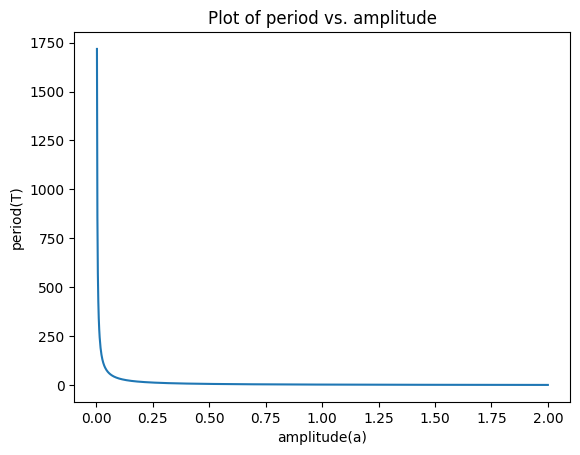


The plot shows that the period and amplitude have a non-linear relationship
as the amplitude increases the time period becomes shorter
The oscillation (Period) speeds up as the amplitude increases, despite the particle having further distrance to travel for larger amplitudes
The larger amplitude might have provided a stronger restoring force


In [2]:
import matplotlib.pyplot as plt # for plotting
from numpy import ones, copy, cos, tan, pi, linspace
# ones     = for an array filled with ones
# copy     = for creating a copy of an array
# cos      = used to compute cosine of an angle
# tan      = used to compute tangent of an angle
# pi       = for the constant pi
# linspace = used for evenly spaced values over a specified interval
from math import sqrt # for computing the sqrt of a number
import numpy as np    # for array and math functions

## DEFINING THE GAUSSXW ##
def gaussxw(N): # Newmann Appendix E

# Initial approximation to roots of the Legendre polynomial
  a = linspace(3, 4*N-1, N)/(4*N+2) # Approximates the initial estimate for the roots of legendre polynomial
  x = cos(pi*a+1/(8*N*N*tan(a)))    # the initial estimate of the roots using cosine function and a correction term

# Find roots using Newton's method
  epsilon = 1e-15                             # Determines convergence
  delta = 1.0                                 # Will be used to measure the change in x
  while delta>epsilon:                        # Checks if delta is greater than or less than epsilon
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range (1,N):                     # this loop is created to refine the estimation for the roots
      p0, p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)  # p0 and p1 shows successive polynomials
    dp = (N+1)*(p0-x*p1)/(1-x*x)              # derivative of p1
    dx = p1/dp                                # change of x taken from the ratio of p1 to dp
    x -= dx                                   # updates the estimation of the roots
    delta = max(abs(dx))                      # updates the convergence measure

  # calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

  return x,w # returns the x and w after calculating the weights
# Defining the polynomial function that will be integrated

## USING THE GAUSSXW TO APPROXIMATE THE INTEGRAL ##
def V(x):
  return x**4
# Defining the integrand
def integ(x, a): # if x==a, the denominator will be zero and the fnct will be undefined
  return 1/sqrt(V(a)-V(x))

# Calculating the Period (T) using the gaussian quadrature
def T(a, N):
# Calculate the sample points and weights, then map them to the required integration domain
  x, w = gaussxw(N)           # uses the gaussxw(N) function to obtain the quadrature points and weight
  xp = 0.5*(a)*x + 0.5* (a)   # used to map the quadrature points from the standard interval [-1,1] to the given [0, a]
  wp = 0.5*(a)*w              # scales the weights properly for the given interval [0, a]

  # perform the integration
  # determines the integral approximation
  T = 0.0
  for k in range(1, N):
    T += wp[k]*integ(xp[k], a) # adds up the product of weights and function values at the quadrature points to get the approximation.
  return sqrt(8*m)*T           # returns the period T scaled by sqrt(8*m)

## PLOTTING ##

# Listing thr Given values
N = 20  # number of slices
m = 1.0 # mass
a = 2.0 # upper-bound amplitude

#Plotting T versus a
N_plot = 1000 # number of pts plotted
a_pts = np.zeros(N_plot) # x-axis
T_pts = np.zeros(N_plot) # y-axis

for i in range(N_plot):
  a_pts[i] = a/N_plot * (i+1) # generated amplitude values for plotting
for i in range(N_plot):
  T_pts[i] = T(a_pts[i], N)   # computes the period for each amplitude

plt.plot(a_pts, T_pts)                    # creates the plot amplitude vs. period
plt.xlabel("amplitude(a)")                # adds the x-label for plot
plt.ylabel("period(T)")                   # adds the y-label for plot
plt.title("Plot of period vs. amplitude") # adds the title of the plot
plt.show()                                # displays the plot
print("") # space
## EXPLANATION OF THE BEHAVIOR OF THE PLOT ##
print ("The plot shows that the period and amplitude have a non-linear relationship")
print ("as the amplitude increases the time period becomes shorter")
print ("The oscillation (Period) speeds up as the amplitude increases, despite the particle having further distrance to travel for larger amplitudes")
print ("The larger amplitude might have provided a stronger restoring force")